In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from open4dense import give_me_orig_ecco
import xarray as xr
import os 
import ecco_v4_py as e4p

int_arg = 0

filedb_lst = []
for i in range(1,13):
    for j in range(1,4):
        filedb_lst.append(f'/sciserver/filedb{i:02}-0{j}')

save_path = filedb_lst[9+int_arg]+'/ocean/wenrui_temp/particle_file/NEP/nc_backward_seas/'
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'

ds = give_me_orig_ecco()
ds['utrans'] = (ds['u_gm']+ds['UVELMASS'])*ds.dyG*ds.drF
ds['vtrans'] = (ds['v_gm']+ds['VVELMASS'])*ds.dxG*ds.drF
ds['wtrans'] = (ds['w_gm']+ds['WVELMASS'])*ds.rA
tseas1 = xr.open_zarr(path+'tseas1.zarr')
tseas2 = xr.open_zarr(path+'tseas2.zarr')
tseas3 = xr.open_zarr(path+'tseas3.zarr')
tseas = xr.concat([tseas1,tseas2,tseas3],dim = 'dayofyear')
ta = (ds.THETA.groupby('time.dayofyear') - tseas).transpose('time','Z','face','Y','X').THETA

from cmocean.cm import balance
import cartopy.crs as ccrs
import cartopy.feature as cfeature
projection = ccrs.Mercator(central_longitude=190.0, min_latitude=-80.0, max_latitude=84.0, latitude_true_scale=45.0)
from open4dense import give_me_ecco_heat_seas

wallt_path = '/sciserver/filedb09-01/ocean/wall_theta.zarr'
data_path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
ds1 = give_me_ecco_heat_seas(data_path,wallt_path,time_mean_vel = False)

xg = np.load('../../james_plot/plotting_xg.npy')
yg = np.load('../../james_plot/plotting_yg.npy')

ds = xr.merge([ds,ds1])
ds

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an

<xarray.Dataset>
Dimensions:     (time: 9497, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 9496, dayofyear: 366)
Coordinates: (12/33)
    XC          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    XG          (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YC          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YG          (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-01T18:00:00 ... 2017-12-31T06:0...
  * time_midp   (time_midp) datetime64[ns] 1992-01-02 1992-01-03 ... 2017-12-31
    ...          ...
    maskW       (Z, face, Y, Xp1) int8 dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    rA          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAs         (face, Yp1, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
  * dayofyear   (dayofyear) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Data variables: (12/68)
    ADVr_SLT    (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    I           (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    lhs         (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    txprime     (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    typrime     (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    tzprime     (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    divuty      (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1992-01-02T00:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Da...
    uuid:                            c2efe382-4168-11eb-8956-0cc47a3f480f

In [2]:
# (ds.XC[7,-1,30:].values == -128.5)

# ds.XC[7,60,40].values

# ds.XC[7,80,40].values

# ds.YG[7,:,30].values

# it = 8005
# v = -ds.utrans[8005:8095,:,7,60:80,30:].mean(dim = ('time','Y')).persist()
# w = ds.wtrans[8005:8095,:,7,60:80,30:].mean(dim = ('time','Y')).persist()

# vv = v
# ww = w
# v = np.array(v)
# w = np.array(w)

In [3]:
y = ds.YC[7,70,30:]
yg = ds.YG[7,70,30:]

In [4]:
# plt.pcolormesh(y,ds.Zl,w)
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [5]:
# ds.time[8005].values,ds.time[8095].values,ds.time[8370].values,ds.time[8460].values

In [6]:
# ds.time[7944].values,ds.time[8674].values

In [7]:
# stream = np.cumsum(v,axis = 0)

In [8]:
# vmax = 1e5
# plt.contourf(yg,ds.Z,stream,levels = 80,vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)
# plt.colorbar()

In [9]:
# vmax = 1e5
# plt.pcolormesh(yg,ds.Z,v,vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)
# plt.colorbar()

In [10]:
# it = 8000

In [11]:
# vmax = 1e-1
# plt.pcolormesh(yg,ds.Z,-ds.UVELSTAR[it,:,7,70,30:],vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [12]:
# vmax = 1e-1
# plt.pcolormesh(yg,ds.Z,-ds.UVELMASS[it,:,7,70,30:],vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [13]:
# vmax = 5e-2
# plt.pcolormesh(yg,ds.Z,-ds.UVELMASS[8005:8095,:,7,70,30:].mean(dim = 'time'),vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [14]:
# vmax = 5e-2
# plt.pcolormesh(yg,ds.Z,-ds.UVELMASS[8370:8460,:,7,70,30:].mean(dim = 'time'),vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [15]:
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
um = xr.open_zarr(path+'utrans_m.zarr')

In [16]:
clim = -um.utrans_m[:,7,60:80,30:].sum(dim = 'Y').persist()

In [17]:
tj = xr.open_zarr(path+'tjijie.zarr')
tm = xr.open_zarr(path+'tmean.zarr')

In [18]:
tmm = tm.tmean[:,7,60:80,30:].mean(dim = 'Y').persist()

In [19]:
# winter = -xr.concat([um.utrans_j[:60],um.utrans_j[-31:]],dim = 'dayofyear').mean(dim = 'dayofyear')[:,7,60:80,30:].mean(dim = 'Y').persist()

In [20]:
tm = -xr.concat([tj.tjijie[:60],tj.tjijie[-31:]],dim = 'dayofyear').mean(dim = 'dayofyear')[:,7,60:80,30:].mean(dim = 'Y').persist()

In [21]:
# winter14 = -ds.utrans[8005:8095,:,7,70,30:].mean(dim = 'time').persist()
# winter15 = -ds.utrans[8370:8460,:,7,70,30:].mean(dim = 'time').persist()

In [22]:
avg1415 = -ds.utrans[7944:8674,:,7,60:80,30:].sum(dim = 'Y').mean(dim = 'time').persist()

In [23]:
theta = ds.THETA[7944:8674,:,7,70,30:].mean(dim = 'time').persist()

In [24]:
# vmax = 1e4
# plt.pcolormesh(yg,ds.Z,clim,vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [25]:
# vmax = 1e4
# plt.pcolormesh(yg,ds.Z,winter,vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.xlim(20,57)
# plt.ylim(-200,0)

In [26]:
# stream14 = np.cumsum(np.array(winter14),axis = 0)
# stream15 = np.cumsum(np.array(winter15),axis = 0)

In [27]:
# stream = np.cumsum(np.array(winter),axis = 0)
stream = np.cumsum(np.array(clim),axis = 0)
stream1415 = np.cumsum(np.array(avg1415),axis = 0)

In [28]:
from matplotlib.patches import Rectangle
import cmocean

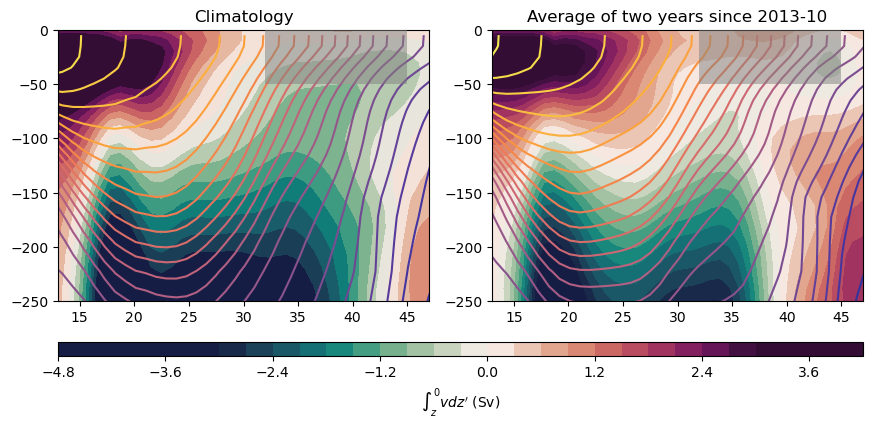

In [29]:
vmax =3
fig,axs = plt.subplots(1,2,figsize = (9,5))
datas = [stream,stream1415]
titles = ['Climatology', 'Average of two years since 2013-10']
temp_datas = [tmm,theta]
zlim = 20
for i in range(2):
    ax = axs[i]
    data = datas[i]
    temp = temp_datas[i]
    ct = ax.contourf(yg,ds.Zl[:zlim],data[:zlim]/1e6,levels = 30,vmax = vmax,vmin = -vmax,cmap = cmocean.cm.curl)
    ax.contour(y,ds.Z,temp,levels = 30,cmap = cmocean.cm.thermal,)
    ax.set_xlim(13,47)
    ax.set_ylim(-250,0)
    # ax.plot([32,45],[-50,-50],zorder = 10,color = 'grey')
    # ax.plot([32,45],[ -0, -0],zorder = 10,color = 'grey')
    # ax.plot([32,32],[-50, -0],zorder = 10,color = 'grey')
    # ax.plot([45,45],[-50, -0],zorder = 10,color = 'grey')
    rect = Rectangle((32,-50),13,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
    ax.add_patch(rect)
    ax.set_title(titles[i])

dummy_ax = plt.subplot(1,1,1)
dummy_ax.axis('off')
plt.colorbar(ct,orientation = 'horizontal',ax = dummy_ax,aspect = 60,extend = 'both', label = r"$\int_z^0 v dz'$ (Sv)",anchor = (0.5,-2))
plt.tight_layout()
# plt.savefig('streamfunc.png')

In [37]:
np.save('goa_yg.npy',np.array(yg))
np.save('goa_y.npy',np.array(y))
np.save('goa_z.npy', np.array(ds.Z))
np.save('goa_zl.npy', np.array(ds.Zl))
np.save('goa_stream_mean.npy',stream)
np.save('goa_stream_anom.npy',stream1415)
np.save('goa_temp_mean.npy',tmm)
np.save('goa_temp_anom.npy',theta)

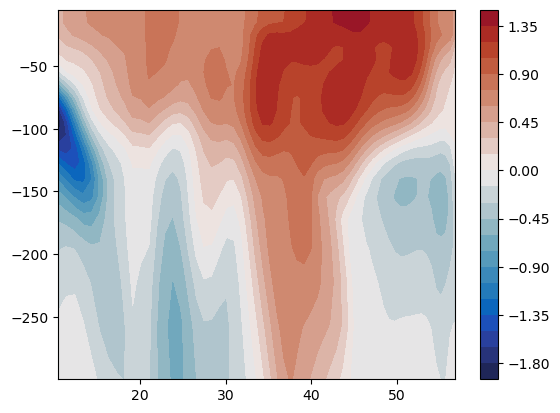

In [30]:
plt.contourf(y,ds.Z[:zlim],-tmm[:zlim]+theta[:zlim],levels = 30,cmap = cmocean.cm.balance,vmax = 2,vmin = -2)
plt.colorbar()

In [31]:
# vmax = 2e5
# fig,axs = plt.subplots(1,3,figsize = (9,5))
# datas = [stream,stream14,stream15]
# titles = ['DJF climatology', 'DJF of 2014','DJF of 2015']
# zlim = 20
# for i in range(3):
#     ax = axs[i]
#     data = datas[i]
#     ct = ax.contourf(yg,ds.Zl[:zlim],data[:zlim],levels = 30,vmax = vmax,vmin = -vmax,cmap = cmocean.cm.curl)
#     ax.contour(y,ds.Z,tm,levels = 30)
#     ax.set_xlim(13,48)
#     ax.set_ylim(-250,0)
#     # ax.plot([32,45],[-50,-50],zorder = 10,color = 'grey')
#     # ax.plot([32,45],[ -0, -0],zorder = 10,color = 'grey')
#     # ax.plot([32,32],[-50, -0],zorder = 10,color = 'grey')
#     # ax.plot([45,45],[-50, -0],zorder = 10,color = 'grey')
#     rect = Rectangle((32,-50),15,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
#     ax.add_patch(rect)
#     ax.set_title(titles[i])

# dummy_ax = plt.subplot(1,1,1)
# dummy_ax.axis('off')
# plt.colorbar(ct,orientation = 'horizontal',ax = dummy_ax,aspect = 60,extend = 'both', label = r"$\int_z^0 v dz'$",anchor = (0.5,-2))
# plt.tight_layout()
# plt.savefig('streamfunc.png')

In [32]:
# vmax = 2e5
# plt.contourf(yg,ds.Zl,stream15,levels = 80,vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.contour(y,ds.Z,tm,levels = 30)
# plt.xlim(13,48)
# plt.ylim(-250,0)
# rect = Rectangle((32,-50),15,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
# plt.gca().add_patch(rect)
# plt.colorbar()

In [33]:
# vmax = 2e5
# plt.contourf(yg,ds.Zl,stream,levels = 80,vmax = vmax,vmin = -vmax,cmap = 'bwr')
# plt.contour(y,ds.Z,tm,levels = 30)
# plt.xlim(13,48)
# plt.ylim(-250,0)
# rect = Rectangle((32,-50),15,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
# plt.gca().add_patch(rect)
# plt.colorbar()